In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [4]:
#reduced Plank mass
Mpl = 2.235e27

EDE = Class()

from classy import Class

# set scf params here
lambda_scf = 0.5
phi_i_scf = 0. #8.984555e-03

# Define parameters as a dictionary
params = {
    # Cosmological parameters
    'h': 0.6821,
    'A_s': 2.216e-9,
    'n_s': 0.9686,
    'omega_b': 0.02253,
    'omega_cdm': 0.1177,
    'tau_reio': 0.085,

    # Neutrinos and relativistic species
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06,

    # Verbosity
    'input_verbose': 10,
    'background_verbose': 10,
    'perturbations_verbose': 1,

    # Dark energy and curvature
    'Omega_Lambda': 0.0,
    'Omega_fld': 0.0,
    'Omega_scf': -1, ## setting -1 tells class to set Omega0_scf = 1 - Sum_i Omega0_i

    # Scalar field (SCF) potential model
    'scf_potential': 'exponential',
    # Scalar field (SCF) parameters
    'scf_parameters': '0.0,0.0,0.0,0.0,0.0,0.0', # just a dummy place holder for, filled w/ scf below by class
    'Lambda0_scf':1., ## we shoot for this value to fulfill the budget equation, in units of H02
    'lambda_scf': lambda_scf, # units of M_pl ^-1
    'phi_i_scf': phi_i_scf, # units of M_pl
    'scf_tuning_index': 1, ## this tunes V_0 in the potential to fulfill the bidget equation: V(chi) ~ V_0 (1 - 0.5 K^2 phi^2)
    'attractor_ic_scf': 'no',
}

EDE.set(params)

obs = {

    'output': '',

}

EDE.set(obs)

EDE.compute()
baM = EDE.get_background()

Reading input parameters
Computing unknown input parameter 'scf_shooting_parameter' using input parameter 'Omega_scf'
 -> matched budget equations by adjusting Omega_scf = 0.697137
 -> matched budget equations by adjusting Omega_scf = 0.697137
Stage 1: background
 -> matched budget equations by adjusting Omega_scf = 0.697137
Stage 1: background
 -> matched budget equations by adjusting Omega_scf = 0.697137
Stage 1: background
 -> matched budget equations by adjusting Omega_scf = 0.697137
Stage 1: background
 -> matched budget equations by adjusting Omega_scf = 0.697137
Stage 1: background
 -> matched budget equations by adjusting Omega_scf = 0.697137
Stage 1: background
 -> matched budget equations by adjusting Omega_scf = 0.697137
Stage 1: background
 -> matched budget equations by adjusting Omega_scf = 0.697137
Stage 1: background
 -> matched budget equations by adjusting Omega_scf = 0.697137
Stage 1: background
 -> matched budget equations by adjusting Omega_scf = 0.697137
Stage 1: 

In [5]:
# General cosmology params
z = baM['z']
a = 1./(1. + z)
rho_crit = baM["(.)rho_crit"]
rho_phi = baM["(.)rho_scf"]
p_phi = baM["(.)p_scf"]
phi_scf = baM["phi_scf"]
w_phi = p_phi/rho_phi
Omega_phi = rho_phi/rho_crit

/home/parallels/anaconda3/envs/class/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


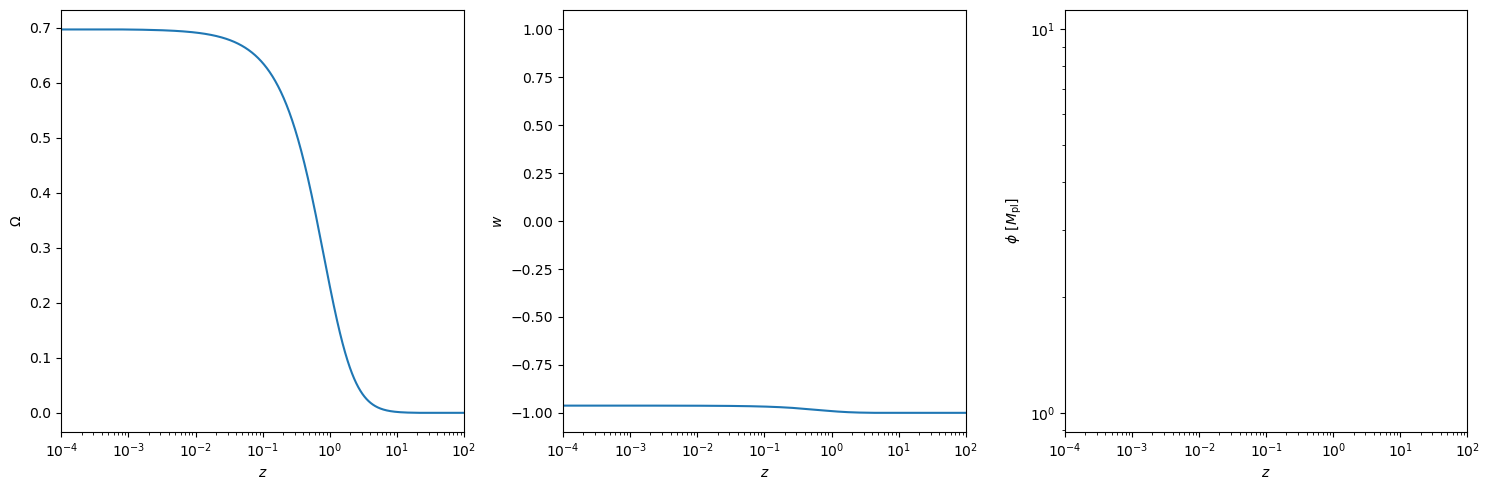

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.semilogx(z,Omega_phi)
plt.ylabel(r'$\Omega$')
plt.xlabel(r'$z$')
plt.xlim([1e-4,1e2])
#plt.xlim([0.,4.])

plt.subplot(1,3,2)
plt.semilogx(z,w_phi)
plt.ylabel(r'$w$')
plt.xlabel(r'$z$')
plt.xlim([1e-4,1e2])
#plt.xlim([0.,4.])
plt.ylim([-1.1,1.1])

plt.subplot(1,3,3)
plt.loglog(z,phi_scf)
plt.ylabel(r'$\phi~[M_{\rm pl}]$')
plt.xlabel(r'$z$')
plt.xlim([1e-4,1e2])
#plt.xlim([0.,4.])

plt.tight_layout()

In [7]:
LCDM_settings = {  'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   'h':0.6821,
                   'omega_b':0.02253,
                   'omega_cdm':0.1177,
                   'A_s':2.216e-9, 
                   'n_s':0.9686,
                   'tau_reio':0.085,
                   'm_ncdm': 0.06,
                   'N_ncdm':1, 
                   'N_ur':2.0328,
                   'l_max_scalars':3508,
                   'non linear':'HMcode',
                   'P_k_max_h/Mpc':100,
                   'z_max_pk':2.}

LCDM = Class()
LCDM.set(LCDM_settings)
LCDM.compute()
hLCDM=LCDM.h()

In [8]:
Hz = np.vectorize(LCDM.Hubble)(z)
DA = np.vectorize(LCDM.angular_distance)(z)
rs = LCDM.rs_drag()

DV = ((1+z)**2 * DA**2 * (z / Hz))**(1/3)

DV_LCDM = ((1+z)**2 * DA**2 * (z / Hz))**(1/3)

# Finally, D_V / r_s
DV_over_rs_lcdm = DV_LCDM / rs

In [9]:
Hz = np.vectorize(EDE.Hubble)(z)
DA = np.vectorize(EDE.angular_distance)(z)
rs = EDE.rs_drag()

DV = ((1+z)**2 * DA**2 * (z / Hz))**(1/3)

# Finally, D_V / r_s
DV_over_rs = DV / rs

In [10]:
# bao redshifts (From DR2 Table IV of https://arxiv.org/abs/2503.14738)
zz = np.array([0.295,0.510,0.706,0.934,1.321,1.484,2.330])
DVrd_data_dr2_mean = np.array([7.944,12.720,16.048,19.720,24.256,26.059,31.267])
DVrd_data_dr2_std = np.array([0.075,0.098,0.110,0.091,0.174,0.400,0.256])

In [11]:
Hz = np.vectorize(LCDM.Hubble)(zz)
DA = np.vectorize(LCDM.angular_distance)(zz)
rs = LCDM.rs_drag()

DV_LCDM = ((1+zz)**2 * DA**2 * (zz / Hz))**(1/3)

# Finally, D_V / r_s
DV_over_rs_lcdm_bins = DV_LCDM / rs

In [12]:
## Binned version of the hilltop to match data redshifts
Hz = np.vectorize(EDE.Hubble)(zz)
DA = np.vectorize(EDE.angular_distance)(zz)
rs = EDE.rs_drag()

DV = ((1+zz)**2 * DA**2 * (zz / Hz))**(1/3)

# Finally, D_V / r_s
DV_over_rs_bins = DV / rs

In [13]:
Hz = np.vectorize(LCDM.Hubble)(zz)
DA = np.vectorize(LCDM.angular_distance)(zz)
rs = LCDM.rs_drag()

DV_LCDM = ((1+zz)**2 * DA**2 * (zz / Hz))**(1/3)

# Finally, D_V / r_s
DV_over_rs_lcdm_bin = DV_LCDM / rs

/home/parallels/anaconda3/envs/class/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


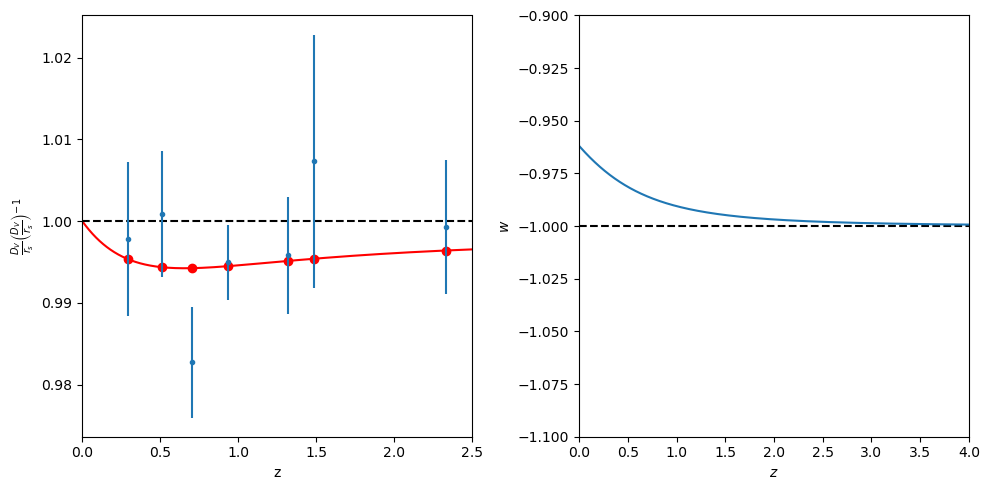

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(z,DV_over_rs/DV_over_rs_lcdm,c='r')
plt.plot(zz,DV_over_rs_bins/DV_over_rs_lcdm_bins,c='r',marker='o',ls='none')
plt.axhline(1.0,ls='--',c='k')
plt.errorbar(zz,DVrd_data_dr2_mean/DV_over_rs_lcdm_bin,yerr=DVrd_data_dr2_std/DV_over_rs_lcdm_bin,ls='none',marker='.')
plt.ylabel(r'$\frac{D_V}{r_s}\left(\frac{D_V}{r_s}\right)^{-1}$')
plt.xlabel(r'z')
plt.xlim([0,2.5])

plt.subplot(1,2,2)
plt.axhline(-1,ls='--',c='k')
plt.plot(z,w_phi)
plt.ylabel(r'$w$')
plt.xlabel(r'$z$')
plt.xlim([0,4])
plt.ylim([-1.1,-0.9])

plt.tight_layout()

In [15]:
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

/home/parallels/anaconda3/envs/class/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


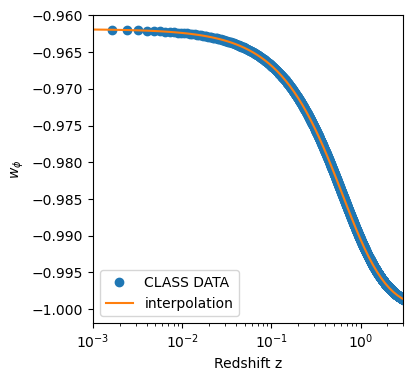

In [16]:
# Interpolator in log(z) space
logz = np.log10(z)
w_interp = interp1d(logz, w_phi)#, kind='cubic', fill_value='extrapolate')

# Create fine grid for plotting
z_fine = np.logspace(np.log10(1e-4), np.log10(4), 100)
w_fine = w_interp(np.log10(z_fine))

# Plot
plt.figure(figsize=(4,4))
plt.semilogx(z, w_phi, 'o', label='CLASS DATA')
plt.semilogx(z_fine, w_fine, '-', label='interpolation')
plt.xlabel('Redshift z')
plt.ylabel(r'$w_\phi$')
plt.legend()
plt.xlim([1e-3,3])
plt.show()

In [17]:
w_z = lambda w0,wa,z: w0 + wa*(1 - 1/(1 + z))
w_fine = w_interp(np.log10(zz))

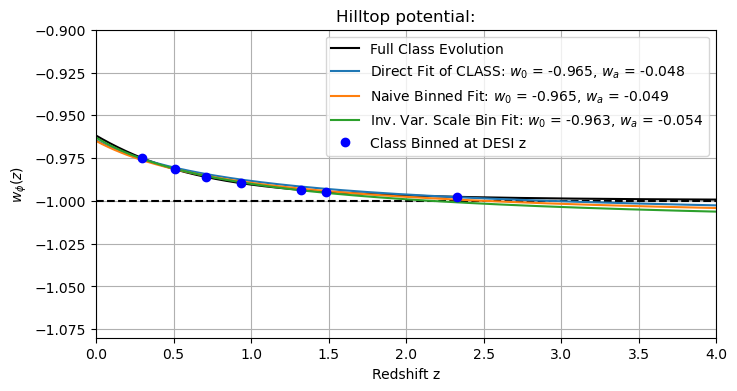

In [18]:
# Data
z_data = z      # redshift
w_phi_data = w_phi  # corresponding w_phi(z)


# Binned Data
z_data_bin = zz          
w_phi_data_bin = w_fine  


# Restrict to z in [0, 4]
mask = (z_data >= 0) & (z_data <= 4)
z_fit = z_data[mask]
w_fit = w_phi_data[mask]

# CPL parametrization function
def w_z(z, w0, wa):
    return w0 + wa * (1 - 1 / (1 + z))

# Fit
popt, pcov = curve_fit(w_z, z_fit, w_fit, p0=(-1, 0))  # initial guess w0=-1, wa=0
w0_fit, wa_fit = popt


## Binned fit
popt_bin, pcov_bin = curve_fit(w_z, z_data_bin, w_phi_data_bin, p0=(-1, 0))
w0_fit_bin, wa_fit_bin = popt_bin

## Binned fit scaled by BAO variance
popt_bin_scaled, pcov_bin_scaled = curve_fit(w_z, z_data_bin, w_phi_data_bin, p0=(-1, 0), sigma=DVrd_data_dr2_std, absolute_sigma=False)
w0_fit_bin_scaled, wa_fit_bin_scaled = popt_bin_scaled

# Evaluate fit for plotting
z_plot = np.linspace(0, 4, 200)
w_fit_curve = w_z(z_plot, w0_fit, wa_fit)
w_fit_curve_bin = w_z(z_plot,w0_fit_bin, wa_fit_bin)
w_fit_curve_bin_scaled = w_z(z_plot,w0_fit_bin_scaled, wa_fit_bin_scaled)


# Plot
plt.figure(figsize=(8,4))
plt.axhline(-1,ls='--',c='k')
plt.plot(z, w_phi, label='Full Class Evolution',c='k')
plt.plot(z_plot, w_fit_curve, '-', label=f'Direct Fit of CLASS: $w_0$ = {w0_fit:.3f}, $w_a$ = {wa_fit:.3f}')
plt.plot(z_plot, w_fit_curve_bin, '-', label=f'Naive Binned Fit: $w_0$ = {w0_fit_bin:.3f}, $w_a$ = {wa_fit_bin:.3f}')
plt.plot(z_plot, w_fit_curve_bin_scaled, '-', label=f'Inv. Var. Scale Bin Fit: $w_0$ = {w0_fit_bin_scaled:.3f}, $w_a$ = {wa_fit_bin_scaled:.3f}')
plt.plot(zz,w_fine,ls='none',marker='o',c='blue',label='Class Binned at DESI z')
plt.xlabel('Redshift z')
plt.ylabel(r'$w_\phi(z)$')
plt.legend(loc='upper right')
plt.grid()
plt.xlim([0,4])
plt.ylim([-1.08,-0.90])
plt.title('Hilltop potential:')
plt.show()